In [1]:
#importing datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 

In [2]:
df=pd.read_csv('C:/Users/kenyowilliams/Downloads/hate_crime.csv')
df

C:\Users\kenyowilliams\AppData\Local\Temp\ipykernel_24292\2160080689.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('C:/Users/kenyowilliams/Downloads/hate_crime.csv')


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209437,558879,2019,WY0010100,Laramie,NaN,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Intimidation,1.0,Government/Public Building,Anti-Gay (Male),Individual,S,S
209438,558880,2019,WY0010200,University of Wyoming,NaN,University or College,WY,Wyoming,Mountain,West,...,Multiple,Multiple,1,Destruction/Damage/Vandalism of Property,NaN,School-College/University,Anti-Black or African American,Other,S,S
209439,661208,2019,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,American Indian or Alaska Native,Not Hispanic or Latino,1,All Other Larceny,1.0,Parking/Drop Lot/Garage,"Anti-Multiple Races, Group",Individual,S,S
209440,463806,2019,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,American Indian or Alaska Native,Not Hispanic or Latino,2,Destruction/Damage/Vandalism of Property;Simpl...,2.0,Residence/Home,Anti-Other Race/Ethnicity/Ancestry,Individual,M,S


**https://www.kaggle.com/datasets/pavansb/hate-crime-usa**

**This data spans from 1991 through 2019 and captures hate crimes in the United States**

In [3]:
#Cleaning Process
#NaN Replacement 
df.fillna(value=0)
#Dropping Unnessecary Columns 
df=df.drop(columns=['INCIDENT_ID','ORI','DIVISION_NAME','AGENCY_TYPE_NAME'],axis=1)
df=df.drop(columns=['MULTIPLE_OFFENSE','MULTIPLE_BIAS','OFFENDER_ETHNICITY','JUVENILE_OFFENDER_COUNT','ADULT_OFFENDER_COUNT','ADULT_VICTIM_COUNT','JUVENILE_VICTIM_COUNT','POPULATION_GROUP_DESC','POPULATION_GROUP_CODE','PUB_AGENCY_UNIT'],axis=1)
df=df.drop(columns=['PUB_AGENCY_NAME','TOTAL_OFFENDER_COUNT','TOTAL_INDIVIDUAL_VICTIMS','VICTIM_TYPES'],axis=1)
#Special Character/Shortening Replacement
df['LOCATION_NAME']=df['LOCATION_NAME'].str.replace('/',' ').astype(str)
df['LOCATION_NAME']=df['LOCATION_NAME'].str.replace('-',' ').astype(str)
df['LOCATION_NAME']=df['LOCATION_NAME'].str.replace(';',' ').astype(str)
#df['LOCATION_NAME']=df['LOCATION_NAME'].str.replace('Etc.','').astype(str)
df['OFFENDER_RACE']=df['OFFENDER_RACE'].str.replace('Black or African American','African American').astype(str)
df['OFFENDER_RACE']=df['OFFENDER_RACE'].str.replace('American Indian or Alaska Native','Native American').astype(str)
df['OFFENDER_RACE']=df['OFFENDER_RACE'].str.replace('Native Hawaiian or Other Pacific Islander','Pacific Islander').astype(str)
df['OFFENSE_NAME']=df['OFFENSE_NAME'].str.replace('Destruction/Damage/Vandalism of Property','Vandalism').astype(str)
df['OFFENSE_NAME']=df['OFFENSE_NAME'].str.replace('Vandalism;Simple Assault','Vandalism').astype(str)
df['OFFENSE_NAME']=df['OFFENSE_NAME'].str.replace('Aggravated Assault;Vandalism','Aggravated Assault').astype(str)
#Removing underscores from Column Names and changing name of column 
df.columns=df.columns.str.replace('_',' ')
df.rename(columns={'BIAS DESC':'TARGET GROUP'},inplace=True)
df

,DATA YEAR,STATE ABBR,STATE NAME,REGION NAME,INCIDENT DATE,OFFENDER RACE,VICTIM COUNT,OFFENSE NAME,LOCATION NAME,TARGET GROUP
0,1991,AR,Arkansas,South,31-Aug-91,White,1,Intimidation,Highway Road Alley Street Sidewalk,Anti-Black or African American
1,1991,AR,Arkansas,South,19-Sep-91,African American,1,Simple Assault,Highway Road Alley Street Sidewalk,Anti-White
2,1991,AR,Arkansas,South,4-Jul-91,African American,1,Aggravated Assault,Residence Home,Anti-Black or African American
3,1991,AR,Arkansas,South,24-Dec-91,African American,2,Aggravated Assault,Highway Road Alley Street Sidewalk,Anti-White
4,1991,AR,Arkansas,South,23-Dec-91,African American,1,Aggravated Assault,Service Gas Station,Anti-White
...,...,...,...,...,...,...,...,...,...,...
209437,2019,WY,Wyoming,West,19-Aug-19,Unknown,1,Intimidation,Government Public Building,Anti-Gay (Male)
209438,2019,WY,Wyoming,West,14-Sep-19,Multiple,1,Vandalism,School College University,Anti-Black or African American
209439,2019,WY,Wyoming,West,5-Apr-19,Native American,1,All Other Larceny,Parking Drop Lot Garage,"Anti-Multiple Races, Group"
209440,2019,WY,Wyoming,West,19-Mar-19,Native American,2,Vandalism,Residence Home,Anti-Other Race/Ethnicity/Ancestry


# ETL Process

**The cleaning process for this data set was particularly extenisve. I first went through and replaced all NaN characters with 0s. From here I went back to the original dataset and dropped the columns that I felt like were not needed in my exploratory analysis using. I wanted to focus on using statistical calculations and visualizations to give this rather large data set a clearer meaning to an outside user. Next I went through and tried to reduce the number of instances that both str and int types would be captured under my columns that were defined as objects which can contain both str and int types together. This consisted on getting rid of specialized characters. Finally I went through and simplified some of the values and column names so that they would be easier to call later on in my exploration of the dataset.**

In [4]:
#Creating new data frame that captures the most targeted groups
crimeoc=df['TARGET GROUP'].value_counts().sort_values(ascending=False)
Target=pd.DataFrame(crimeoc)
Target.head(10)

,TARGET GROUP
Anti-Black or African American,71227
Anti-Jewish,27153
Anti-White,24063
Anti-Gay (Male),21097
Anti-Hispanic or Latino,13400
Anti-Other Race/Ethnicity/Ancestry,10438
"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",6383
Anti-Asian,6097
"Anti-Multiple Races, Group",4992
Anti-Lesbian (Female),4390


In [10]:
#Data Set Spans 28 years or 10,227 Days
#Adding Targets Per Day column to Target df
Target['TARGETS PER DAY']=round(Target['TARGET GROUP'].astype(int)/(10227),0)
Target.head(10)
#Adding Percentage of Total Targets Column 
Target['PERCENTAGE OF TOTAL TARGETS']=round(Target['TARGET GROUP'].head(10).astype(int)/(Target['TARGET GROUP'].head(10).sum())*100,1)
Target.head(10)

,TARGET GROUP,TARGETS PER DAY,PERCENTAGE OF TOTAL TARGETS
Anti-Black or African American,71227,7.0,37.6
Anti-Jewish,27153,3.0,14.3
Anti-White,24063,2.0,12.7
Anti-Gay (Male),21097,2.0,11.1
Anti-Hispanic or Latino,13400,1.0,7.1
Anti-Other Race/Ethnicity/Ancestry,10438,1.0,5.5
"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",6383,1.0,3.4
Anti-Asian,6097,1.0,3.2
"Anti-Multiple Races, Group",4992,0.0,2.6
Anti-Lesbian (Female),4390,0.0,2.3


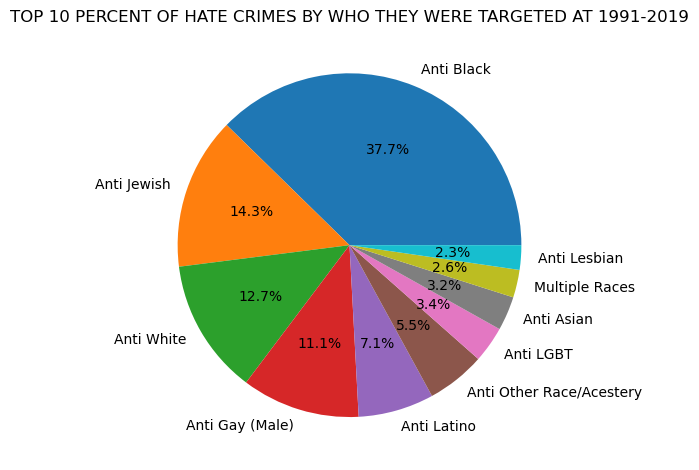

In [22]:
#Pie Chart for Percentage 
DataFrame=pd.DataFrame({
    'Label':['Anti Black', 'Anti Jewish','Anti White','Anti Gay (Male)','Anti Latino','Anti Other Race/Acestery','Anti LGBT','Anti Asian','Multiple Races','Anti Lesbian'
            ]})
plot=plt.pie(Target['PERCENTAGE OF TOTAL TARGETS'].head(10),labels=DataFrame['Label'].head(10),autopct='%.1f%%')
plt.title('TOP 10 PERCENT OF HATE CRIMES BY WHO THEY WERE TARGETED AT 1991-2019')
plt.tight_layout()
plt.show()


**This graph was predicated on the sort of values I executed above the plotting functions. I wanted to create a visual representation of what those numbers looked like in comparison to each other. One thing that I wish this dataset provided me was a clearer understanding of the hate crimes involving the LBTQ community. As you can see above Anti Gay (Male) accounted for the largest proportion of hate crimes from this sector. However, I am not really too sure how to distinguish Anti LGBT from Anti Lesbian. Even more alarming from this sector is that if you were to combine the percentages from Anti Gay (Male), Anti LGBT, and Anti Lesbian it would account for a larger proportion of hate crimes than Anti Jewish hate crimes do. As I continue to work with this dataset I strive to creat similar graphs using similar sort methods for types of crimes as well as location.**

In [7]:
#Creating new dataframe that captures location 
locay=df['STATE NAME'].value_counts().sort_values(ascending=False)
loc=pd.DataFrame(locay)
loc.head(10)

,STATE NAME
California,34911
New York,19543
New Jersey,19524
Michigan,11834
Massachusetts,10801
Ohio,8548
Washington,8059
Texas,7996
Arizona,6482
Maryland,5648


In [9]:
#Creating a percentage and daily column for loc df
loc['INCIDENTS PER DAY']=round(loc['STATE NAME'].astype(int)/(10227),0)
loc['PERCENTAGE OF TOTAL INCIDENTS']=round(loc['STATE NAME'].head(10).astype(int)/(loc['STATE NAME'].head(10).sum())*100,1)
loc.head(10)

,STATE NAME,INCIDENTS PER DAY,PERCENTAGE OF TOTAL INCIDENTS
California,34911,3.0,26.2
New York,19543,2.0,14.7
New Jersey,19524,2.0,14.6
Michigan,11834,1.0,8.9
Massachusetts,10801,1.0,8.1
Ohio,8548,1.0,6.4
Washington,8059,1.0,6.0
Texas,7996,1.0,6.0
Arizona,6482,1.0,4.9
Maryland,5648,1.0,4.2


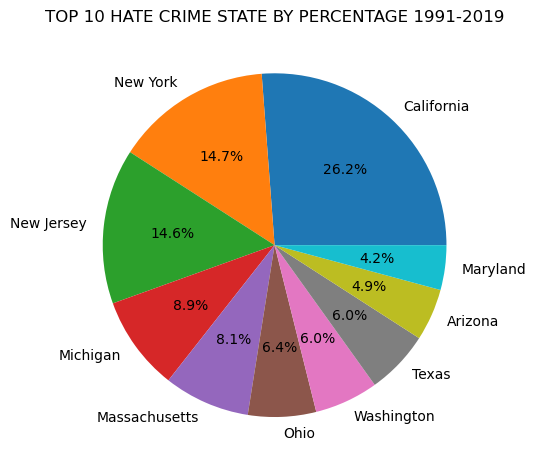

In [21]:
#Pie Chart for location 
DataFrame2=pd.DataFrame({
    'Label':['California', 'New York','New Jersey','Michigan','Massachusetts','Ohio','Washington','Texas','Arizona','Maryland'
            ]})
locplot=plt.pie(loc['PERCENTAGE OF TOTAL INCIDENTS'].head(10),labels=DataFrame2['Label'].head(10),autopct='%.1f%%')
plt.title('TOP 10 HATE CRIME STATE BY PERCENTAGE 1991-2019')
plt.tight_layout()
plt.show()

# Analysis

**This visual is rather shocking to me. Some of the more populated states make sense in terms of their high percentages of hate crime statistics, but there is one in particular that stands out. This stand out is texas. I did a deeper dive into the demographic break down differences between Texas and California and they were not all that different. So further research should be conducted to search for a reason why over this time period, California seemed to have Hate Crimes happen at a significantly more frequent clip than Texas did. The optimistic side of me wants to blame this on differences in belief and efficacy of reporting systems but in reality I know this cannot be the sole reason for this much of a difference.**

In [13]:
#Repeating process but now by crime type
ct=df['OFFENSE NAME'].value_counts().sort_values(ascending=False)
crimetype=pd.DataFrame(ct)
crimetype['INCIDENTS PER DAY']=round(crimetype['OFFENSE NAME'].astype(int)/(10227),0)
crimetype['PERCENTAGE OF TOTAL INCIDENTS']=round(crimetype['OFFENSE NAME'].head(10).astype(int)/(crimetype['OFFENSE NAME'].head(10).sum())*100,1)
crimetype.head(10)

,OFFENSE NAME,INCIDENTS PER DAY,PERCENTAGE OF TOTAL INCIDENTS
Vandalism,64794,6.0,32.4
Intimidation,60971,6.0,30.5
Simple Assault,39768,4.0,19.9
Aggravated Assault,22255,2.0,11.1
Robbery,3573,0.0,1.8
Burglary/Breaking & Entering,2771,0.0,1.4
Vandalism;Intimidation,1813,0.0,0.9
All Other Larceny,1756,0.0,0.9
Arson,1141,0.0,0.6
Drug/Narcotic Violations,924,0.0,0.5


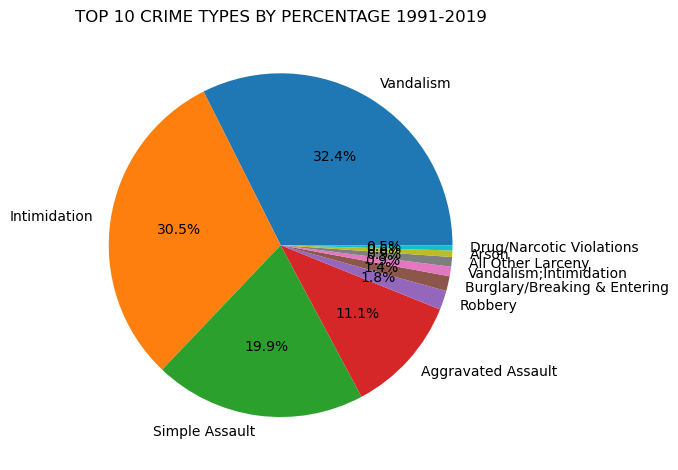

In [20]:
#Pie Chart for Offense types
DataFrame3=pd.DataFrame({
    'Label':['Vandalism', 'Intimidation','Simple Assault','Aggravated Assault','Robbery','Burglary/Breaking & Entering','Vandalism;Intimidation','All Other Larceny','Arson','Drug/Narcotic Violations'
            ]})
crimeplot=plt.pie(crimetype['PERCENTAGE OF TOTAL INCIDENTS'].head(10),labels=DataFrame3['Label'].head(10),autopct='%.1f%%')
plt.title('TOP 10 CRIME TYPES BY PERCENTAGE 1991-2019')
plt.tight_layout()
plt.show()

# Analysis

**This graph reveals information about the kinds of Hate Crimes that occured during our time period. From the looks of it it appears as though the majority (~63%) of hate crimes were non violent acts but the proporion that is considered violent acts (Assault ~31%) is large enough to be considered significant. Something that stuck out about this graph was the section labeled Vandalism;Intimdation. A better description of what events make up this small percentage would allow me to re classify them as either Intimidation or Vandalism. Seeing how we are not given description of the hate crimes in the dataset this move is not viable.**